# 머신러닝 모델 비교

- 서포트벡터머신, 결정 트리, 랜덤 포레스트
- 교차 검증
- 모델은 분류(classification)와 회귀에 모두 사용된다
- WHO 수명 예측 데이터 사용

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.13.52.png?raw=1" align='left'  width=400>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.15.40.png?raw=1" align='left'  width=500>

## 데이터

## import 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import seaborn as sns
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 데이터 읽기

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/Life%20Expectancy%20Data.csv")
print(data.shape)
data[:5]

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data = data.dropna()
data.Status = data.Status.map({"Developing":0, "Developed":1})
df = data.copy()
data[:3]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


# 참고: 교차검증
- 훈련/검증 데이터 나누는 작업을 train_test_split을 사용하지 않고 전체 데이터를 대상으로 여러번 수행
- 다양한 조합의 훈련/검증 데이터로 검증함으로써 모델의 성능을 평가
- cross_val_score 함수를 사용하며 데이터를 랜덤하게 섞지 않는 옵션도 있다 (shuffle=False)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.27.57.png?raw=1" align='left'  width=400>

In [5]:
def cross_validation(model, X, y, cv=5): 
    cv = KFold(5, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

# 회귀 모델

In [6]:
y = df['Life expectancy ']

features = df.columns.difference(['Country','Life expectancy '])
X = df[features]
cont_features = X.columns.difference(['Status'])
X.loc[:,cont_features] = StandardScaler().fit_transform(X[cont_features])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round((y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      mean_absolute_error(y_test,y_pred).round(3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))
    print("Mean Absolute Percentile Error: ", 
      mean_absolute_percentage_error(y_test,y_pred).round(3))
    print("Percent Estimation: ", 
      100*(1-mean_absolute_percentage_error(y_test,y_pred)).round(3),'%')

In [8]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    fig_size= 8
    if len(features) > 30: fig_size=12
    if len(features) > 40: fig_size=18
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(8,fig_size))
    plt.xlabel('Features Importance/Weights')
    plt.gca().legend_ = None

## 선형 모델

In [9]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  10.691
Mean Absolute Error:  2.821
Root Mean Squared Error:  3.651
R-Squared:  0.828
Mean Absolute Percentile Error:  0.043
Percent Estimation:  95.7 %


In [10]:
cross_validation(linear_reg,X,y)

0.8336

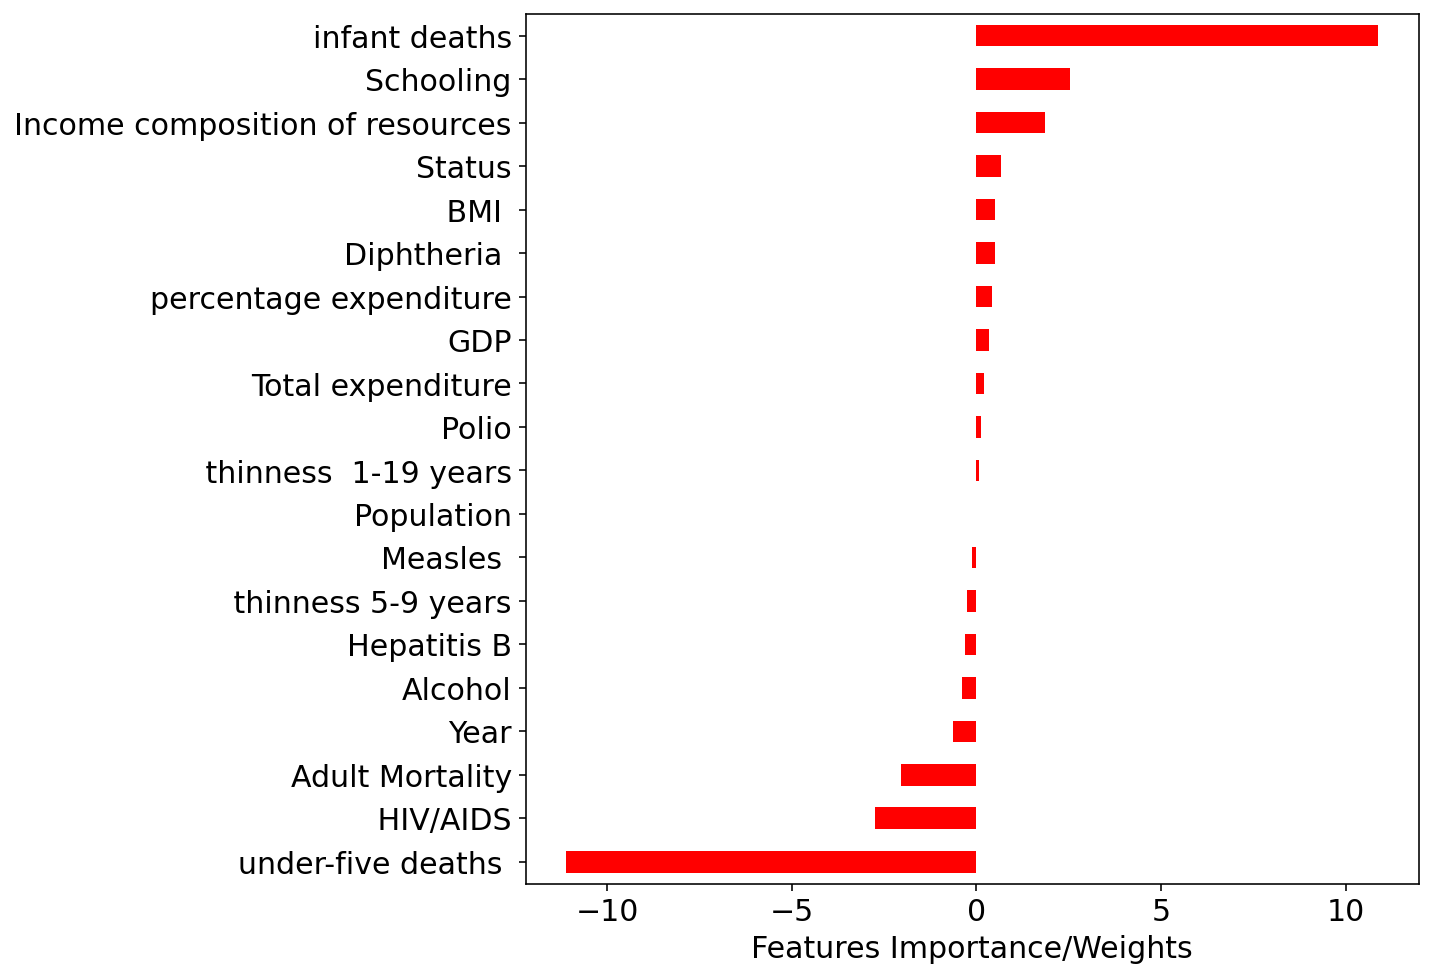

In [11]:
plot_features_weights(X.columns, linear_reg.coef_)

## SVM

In [12]:
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  9.975
Mean Absolute Error:  2.793
Root Mean Squared Error:  3.707
R-Squared:  0.822
Mean Absolute Percentile Error:  0.042
Percent Estimation:  95.8 %


In [13]:
cross_validation(svr,X,y)

0.8127

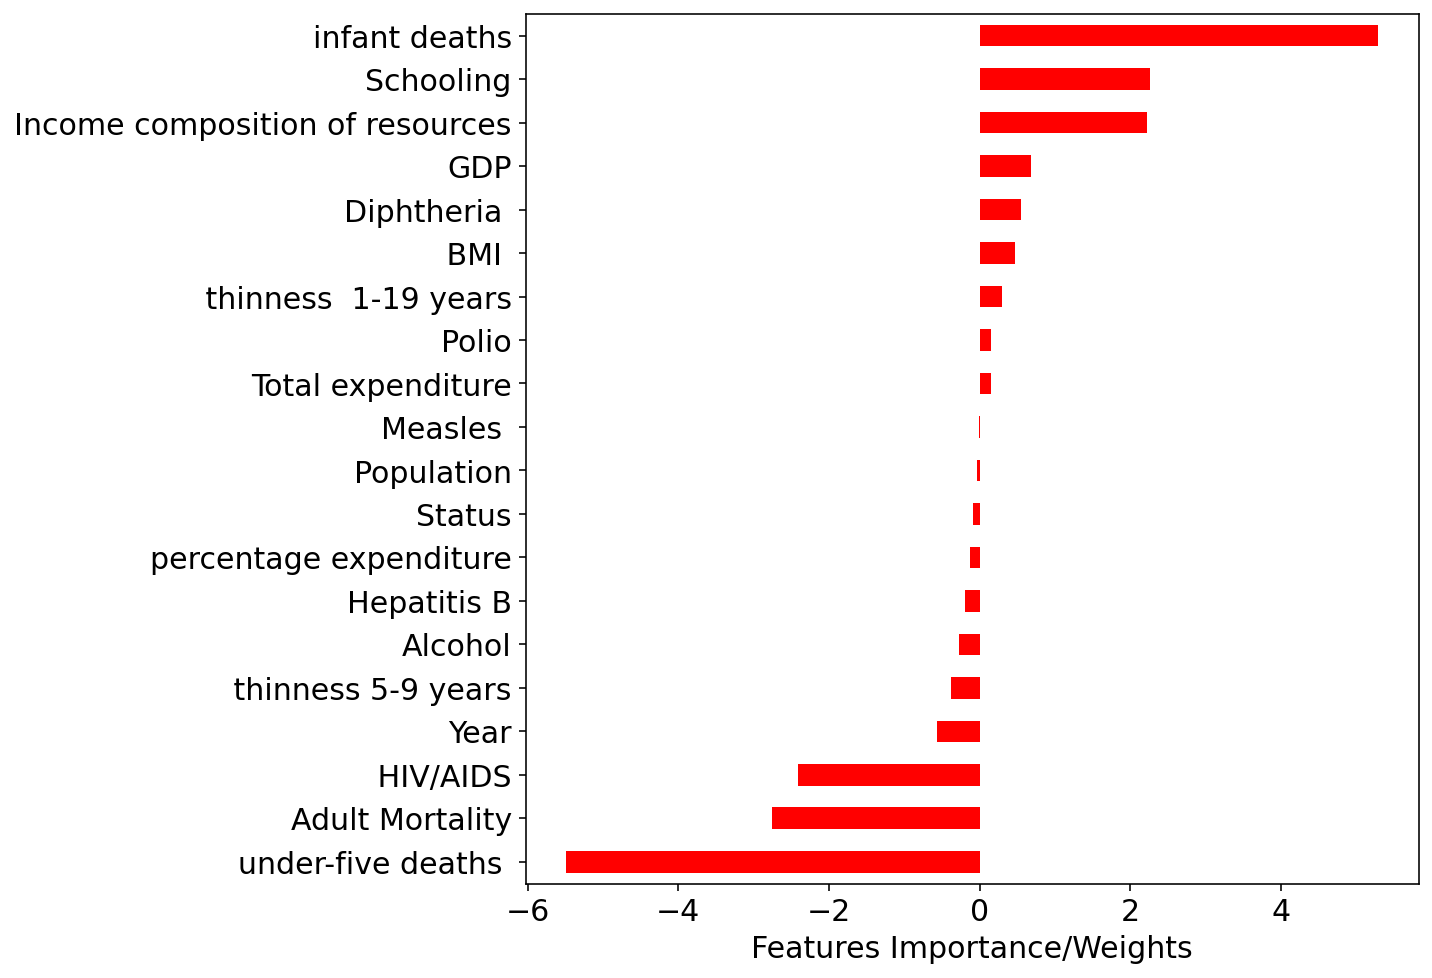

In [16]:
plot_features_weights(X.columns, svr.coef_.ravel())

- SVM 개념
 - 선형모델을 개선한 모델 (마진이 있는 결정경계 설정)
 - 학습 샘플수가 적을 때 유용
 - 다차항을 추가한 커널 기법 도입으로 성능 개선

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.28.37.png?raw=1" align='left'  width=500>

## 결정트리

In [17]:
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  11.7
Mean Absolute Error:  1.445
Root Mean Squared Error:  2.434
R-Squared:  0.923
Mean Absolute Percentile Error:  0.022
Percent Estimation:  97.8 %


In [19]:
cross_validation(dtr,X,y)

0.9145

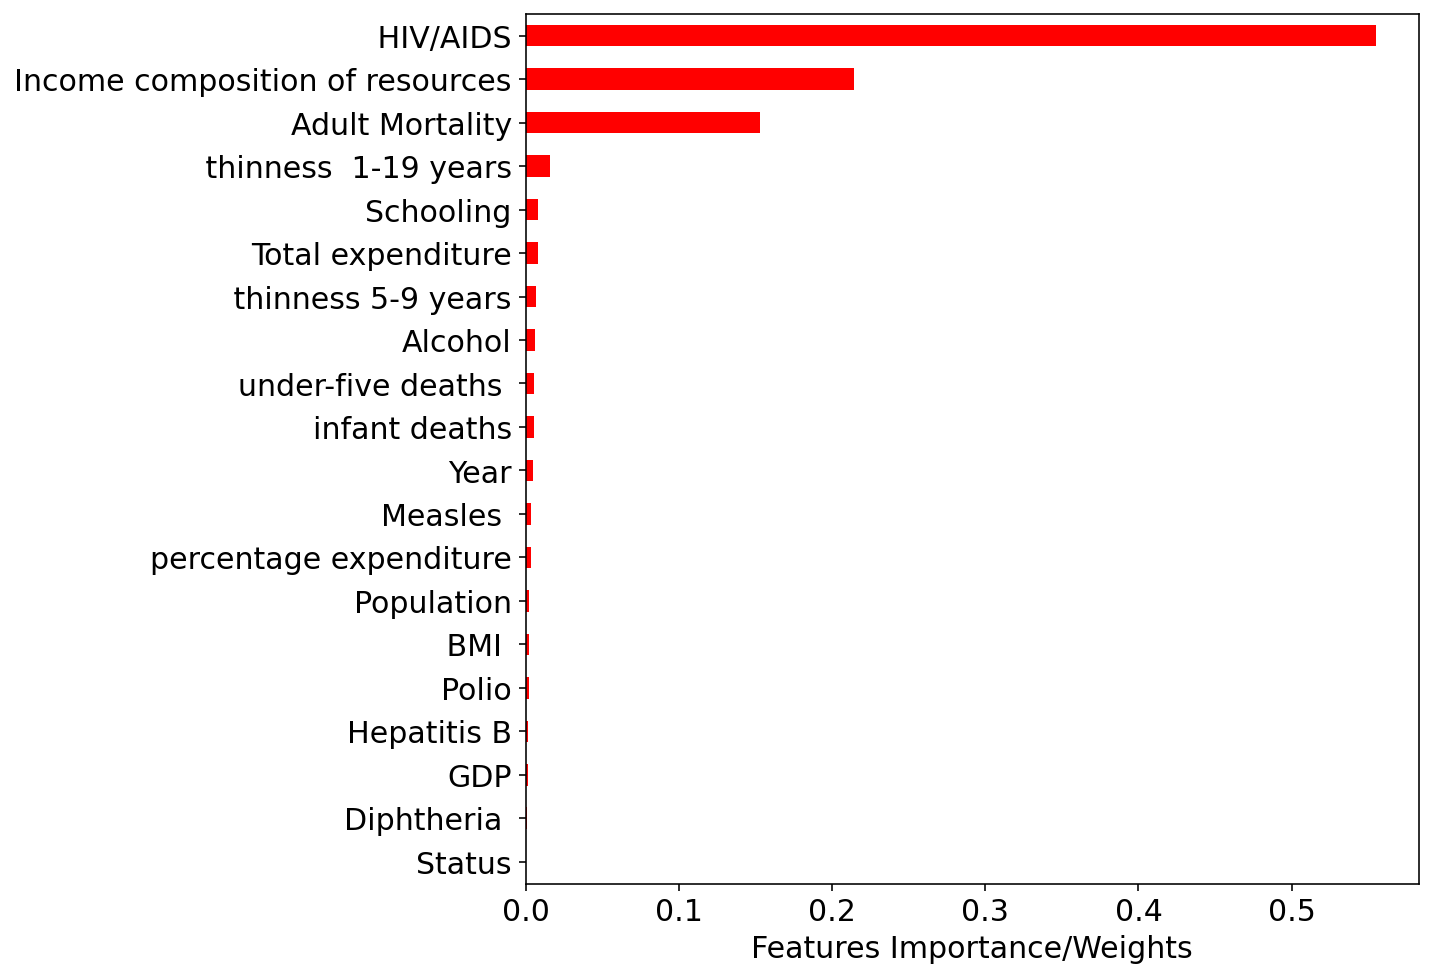

In [20]:
plot_features_weights(X.columns, dtr.feature_importances_)

- 결정트리 보기

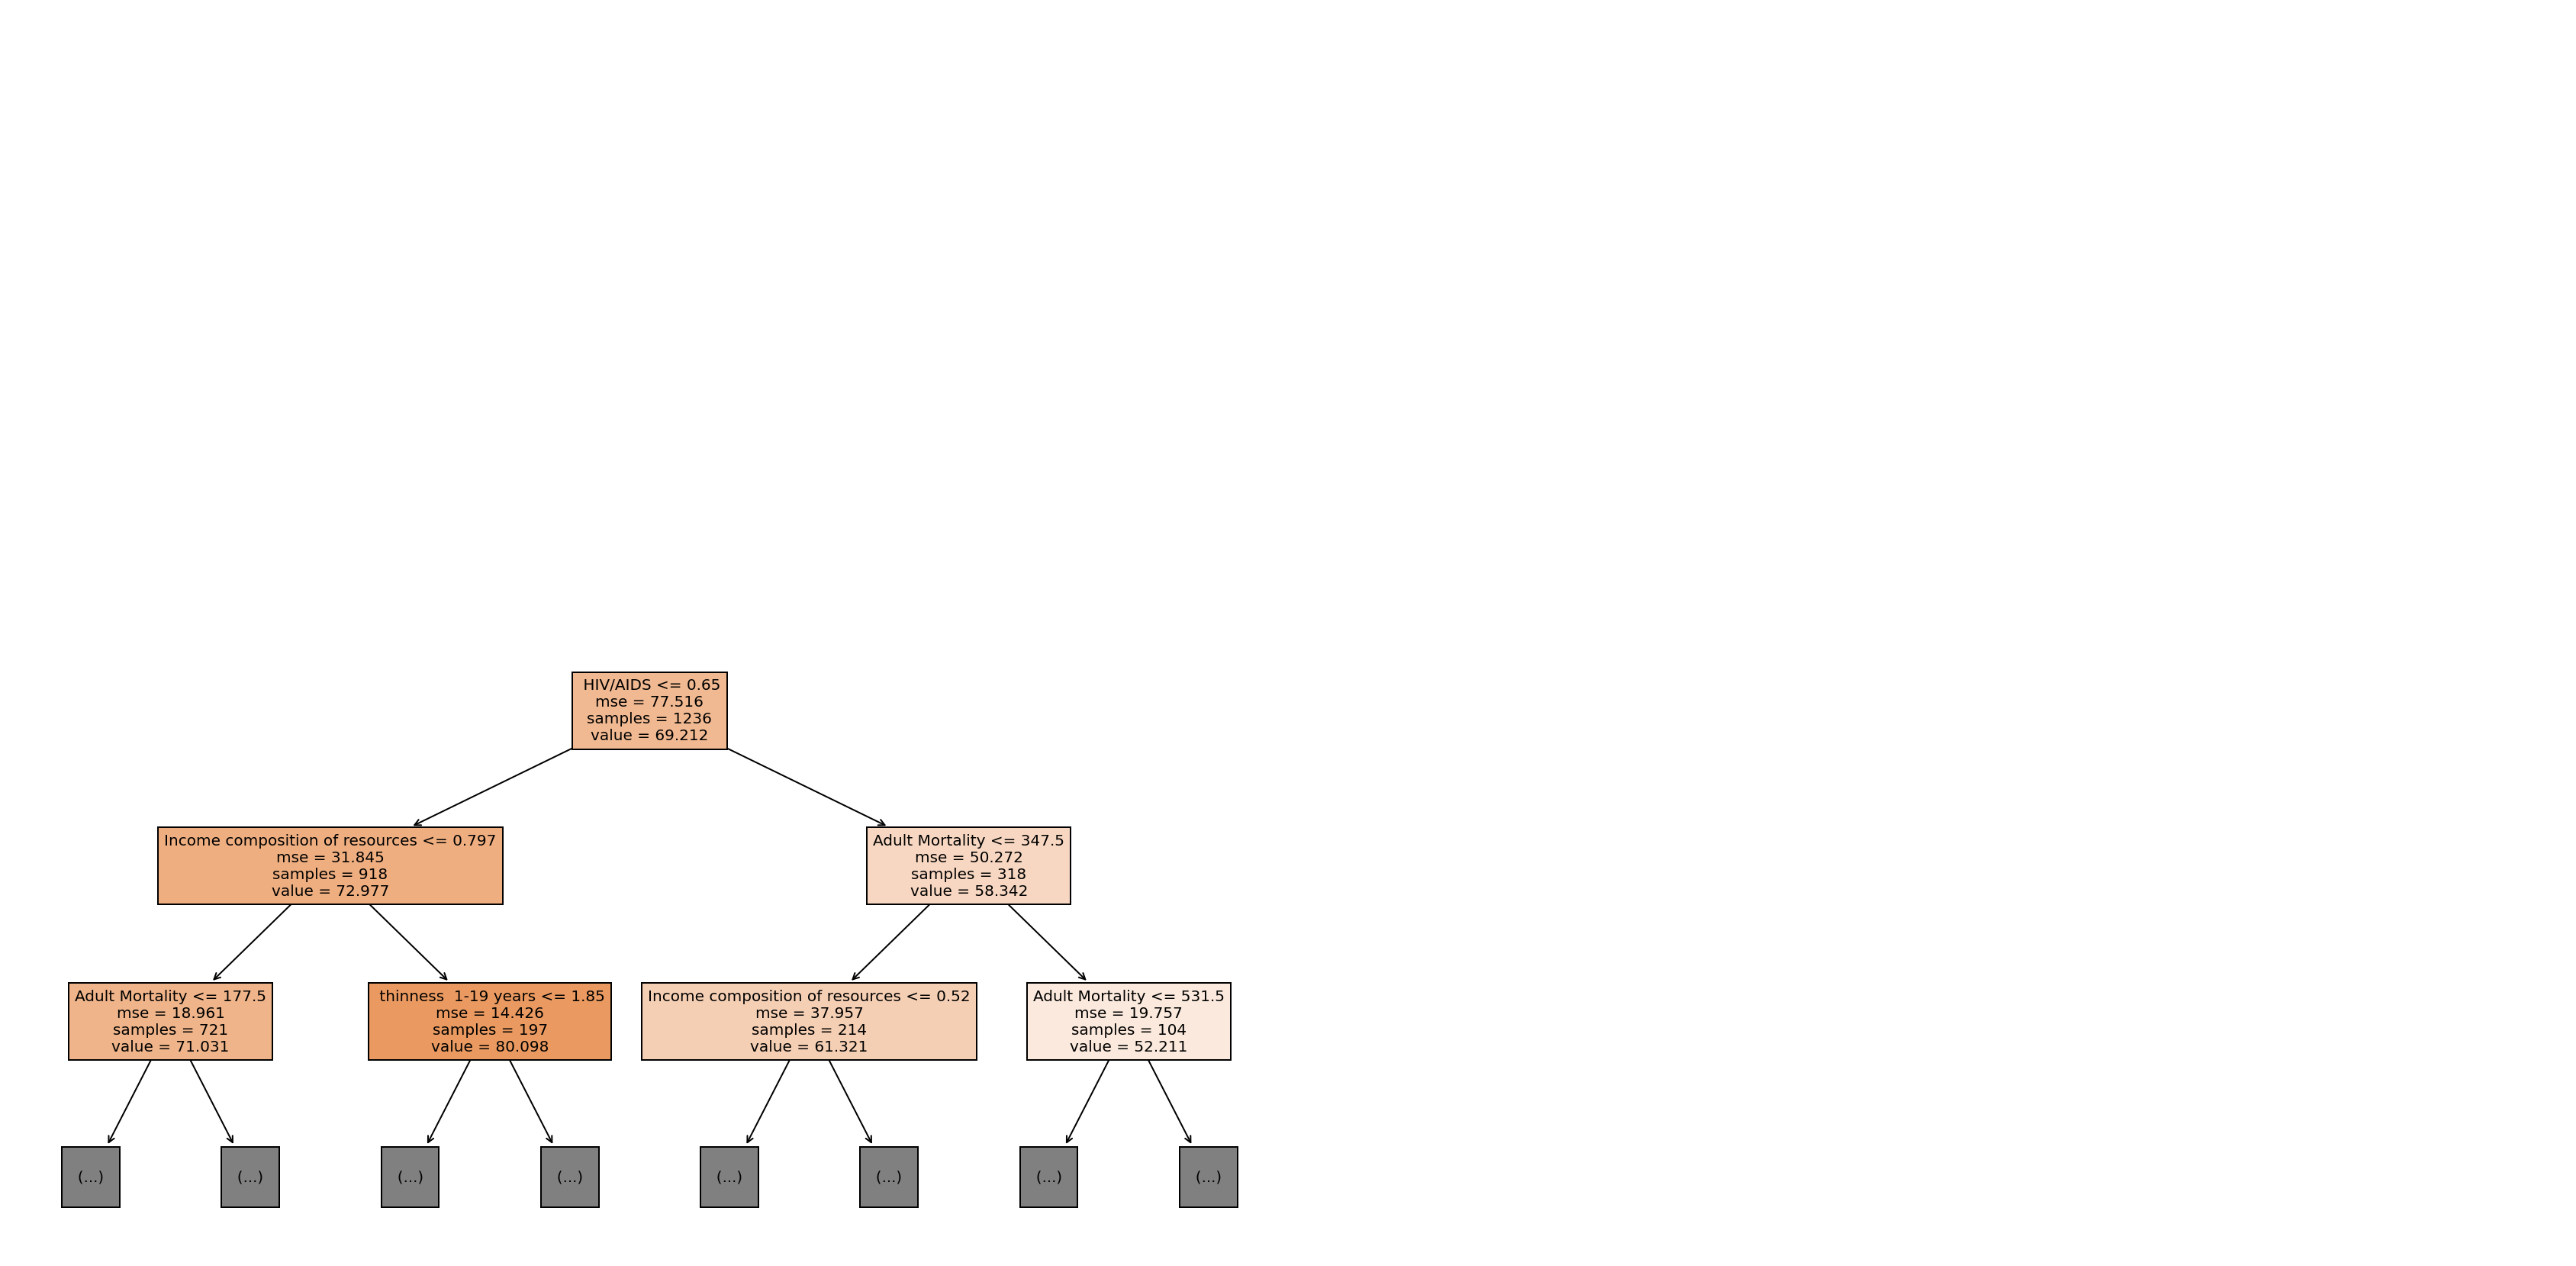

In [21]:
plt.figure(figsize=(30,15))
# plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtr, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [22]:
print(tree.export_text(dtr, feature_names=list(X.columns)))

|---  HIV/AIDS <= 0.65
|   |--- Income composition of resources <= 0.80
|   |   |--- Adult Mortality <= 177.50
|   |   |   |--- Income composition of resources <= 0.58
|   |   |   |   |--- Schooling <= 9.25
|   |   |   |   |   |--- Income composition of resources <= 0.39
|   |   |   |   |   |   |--- value: [56.20]
|   |   |   |   |   |--- Income composition of resources >  0.39
|   |   |   |   |   |   |--- Polio <= 91.00
|   |   |   |   |   |   |   |---  thinness 5-9 years <= 13.40
|   |   |   |   |   |   |   |   |--- Year <= 2007.00
|   |   |   |   |   |   |   |   |   |--- Population <= 452573.50
|   |   |   |   |   |   |   |   |   |   |--- under-five deaths  <= 132.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [66.50]
|   |   |   |   |   |   |   |   |   |   |--- under-five deaths  >  132.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [66.80]
|   |   |   |   |   |   |   |   |   |--- Population >  452573.50
|   |   |   |   |   |   |   |   |   |   |--- Polio <= 

## 랜덤 포레스트

In [23]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  7.283
Mean Absolute Error:  1.154
Root Mean Squared Error:  1.703
R-Squared:  0.962
Mean Absolute Percentile Error:  0.017
Percent Estimation:  98.3 %


In [24]:
cross_validation(rfr,X,y)

0.9559

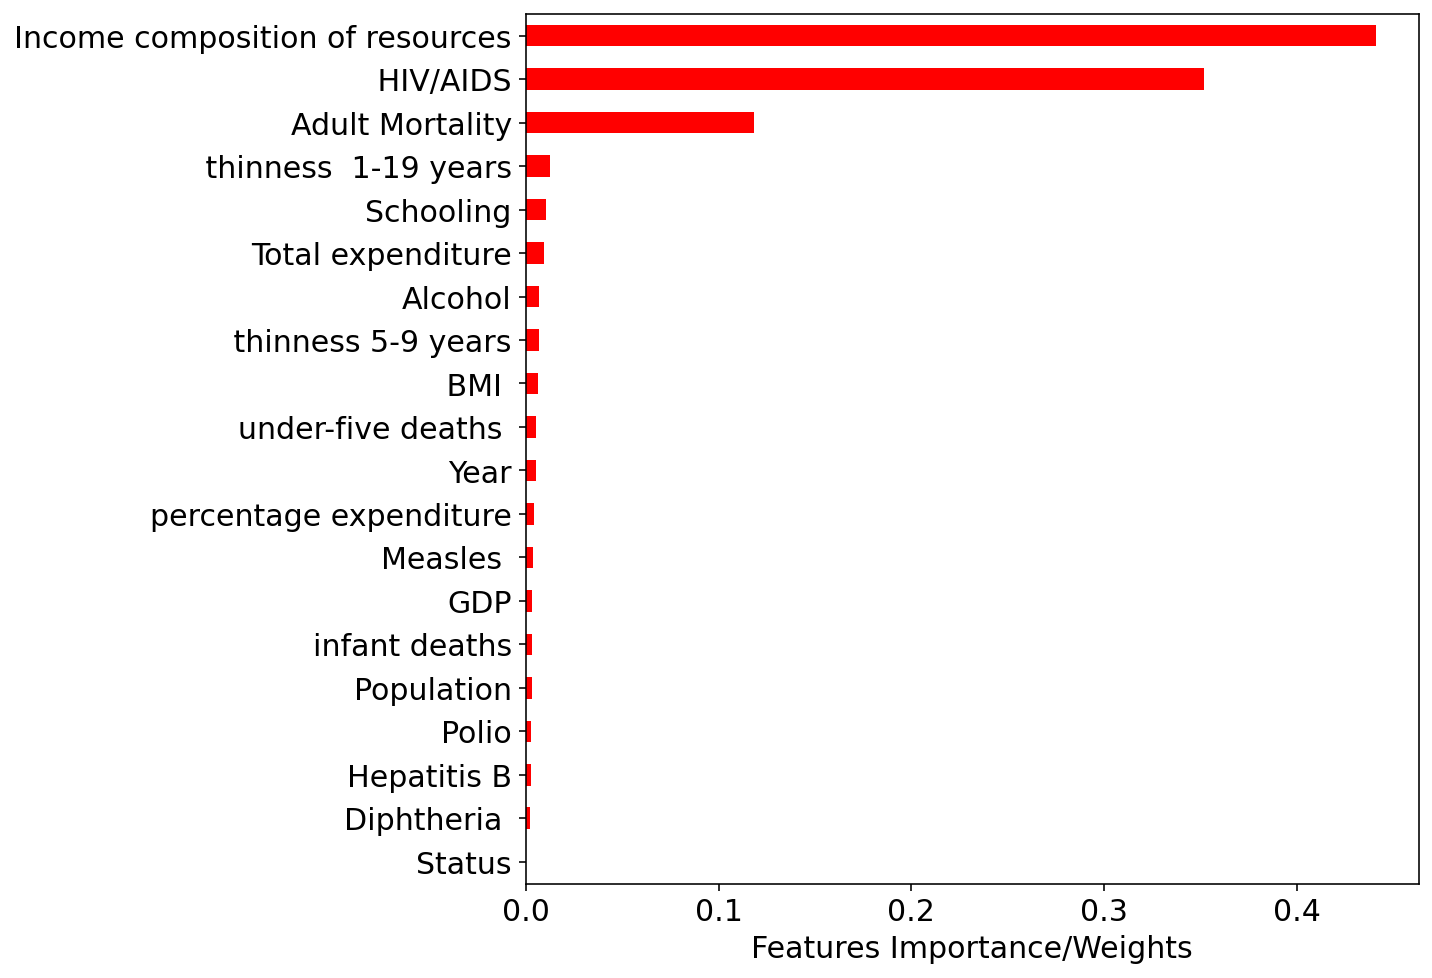

In [25]:
plot_features_weights(X.columns, rfr.feature_importances_)

In [26]:
#  !conda install lightgbm -y

## 부스팅 (LightGBM)

In [27]:
lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  8.288
Mean Absolute Error:  1.188
Root Mean Squared Error:  1.776
R-Squared:  0.959
Mean Absolute Percentile Error:  0.018
Percent Estimation:  98.2 %


In [28]:
cross_validation(lgbm_r,X,y)

0.9575

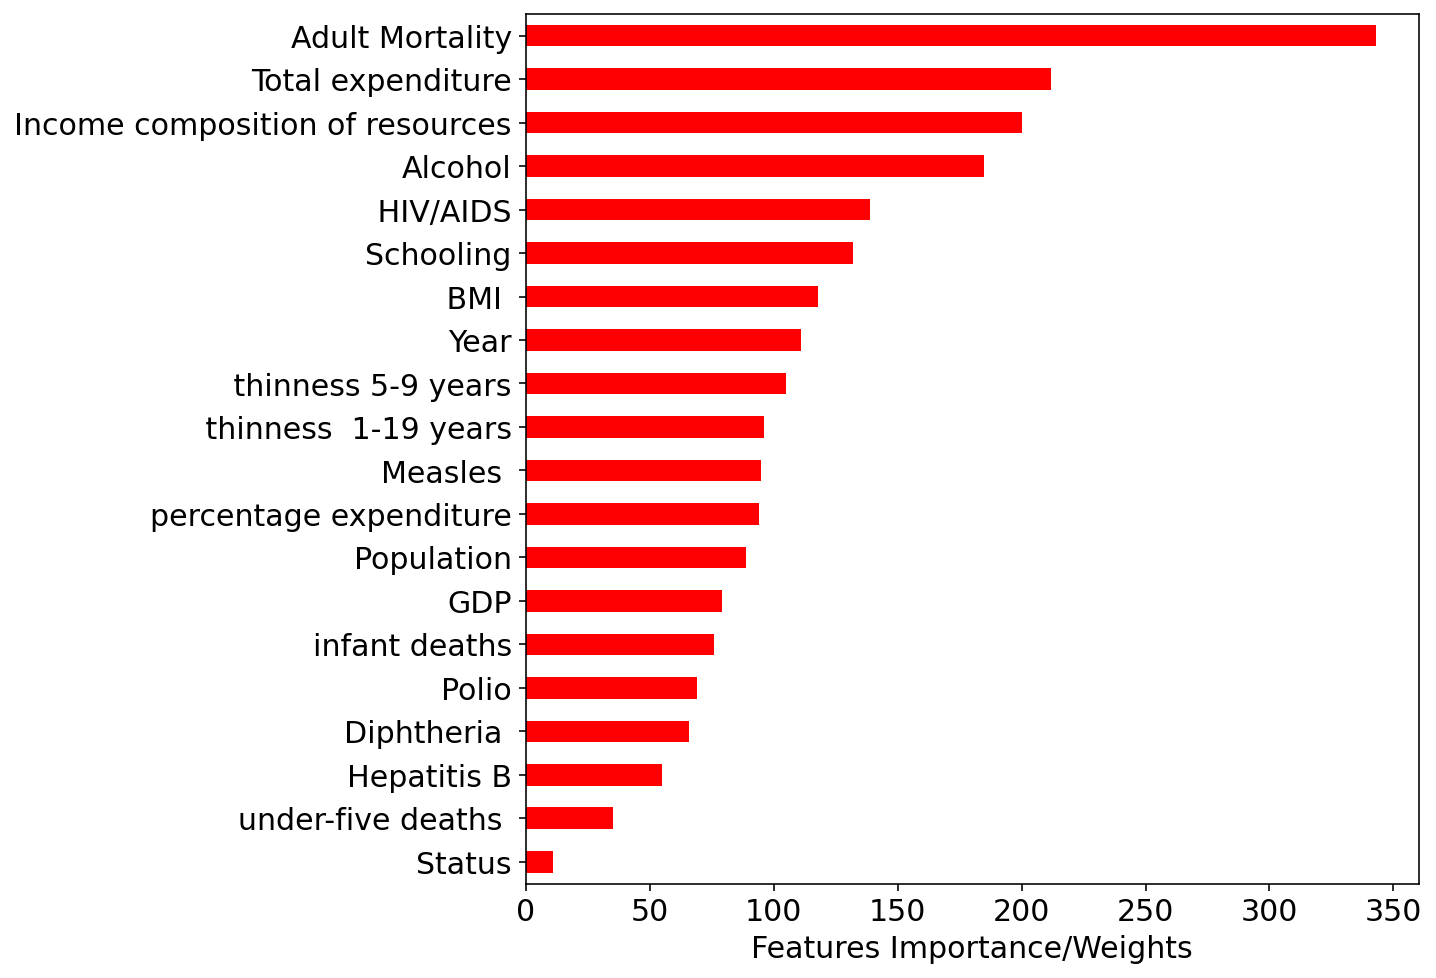

In [29]:
plot_features_weights(X.columns, lgbm_r.feature_importances_)

# 분류 모델

In [30]:
y = df['Status']

features = df.columns.difference(['Country','Status'])
X = df[features]
X[:3]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Life expectancy,Measles,Polio,Population,Schooling,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,19.1,0.1,17.2,17.3,263.0,0.01,65.0,584.259210,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,8.16,2015,62,71.279624,83
1,18.6,0.1,17.5,17.5,271.0,0.01,62.0,612.696514,62.0,0.476,59.9,492,58.0,327582.0,10.0,8.18,2014,64,73.523582,86
2,18.1,0.1,17.7,17.7,268.0,0.01,64.0,631.744976,64.0,0.470,59.9,430,62.0,31731688.0,9.9,8.13,2013,66,73.219243,89


In [31]:
# cont_features = X.columns.difference(['Status'])
X.loc[:,:] = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 선형 모델

In [32]:
lin = SGDClassifier() # (1) 모델 생성
lin.fit(X_train, y_train) # (2) 훈련
lin.score(X_test, y_test) # (3) 평가 (정확도)

0.9176755447941889

In [33]:
cross_validation(lin,X,y)

0.9309

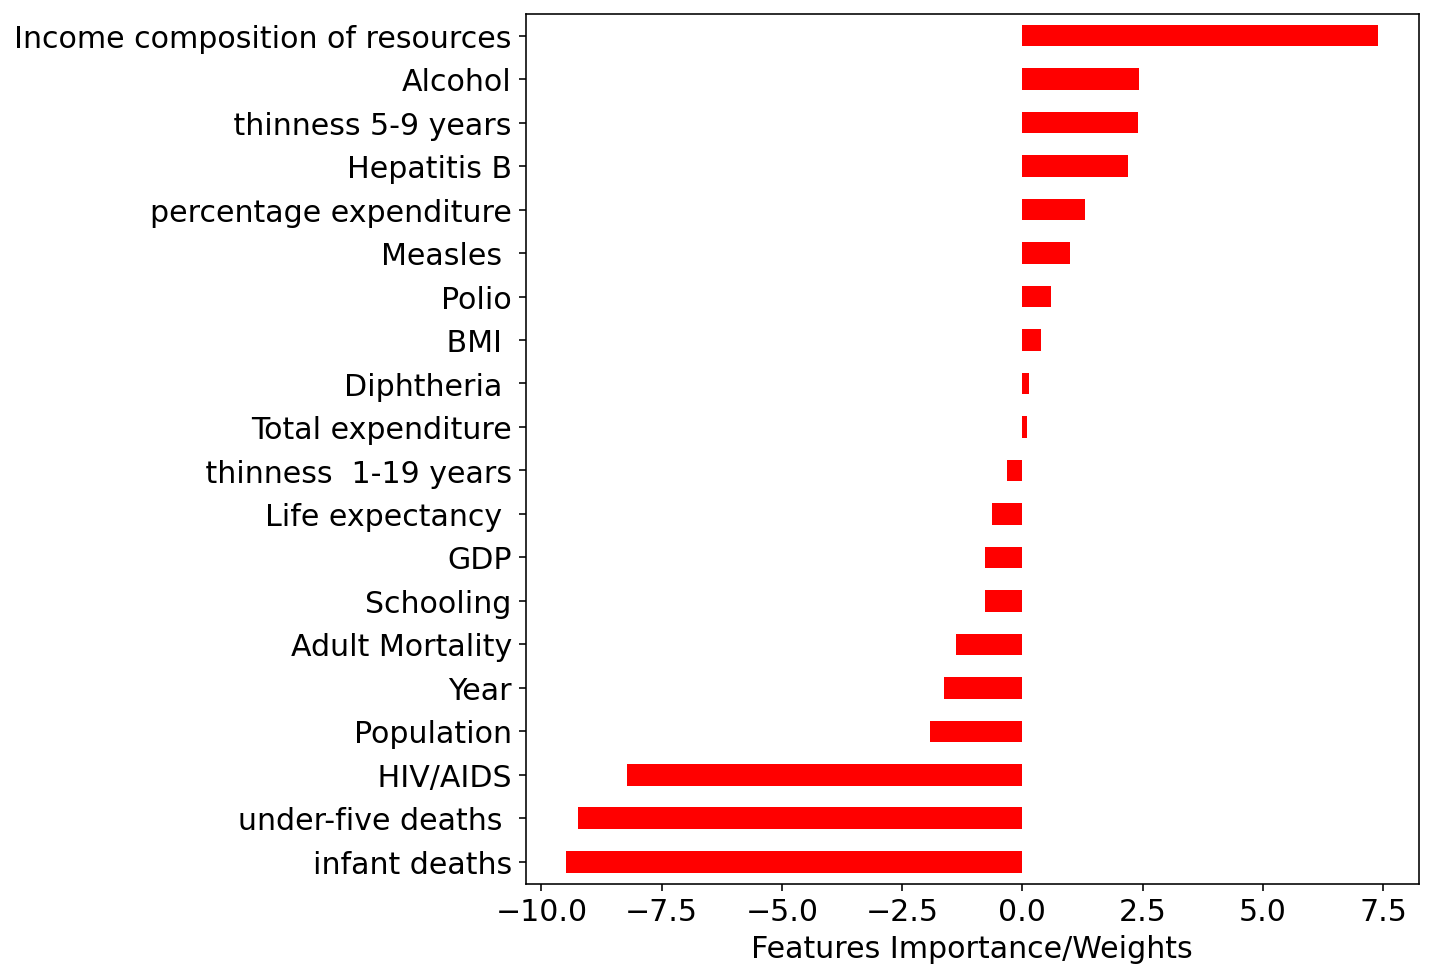

In [34]:
plot_features_weights(X.columns, lin.coef_.ravel())

## SVM

In [35]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9346246973365617

In [36]:
cross_validation(svc,X,y)

0.9369

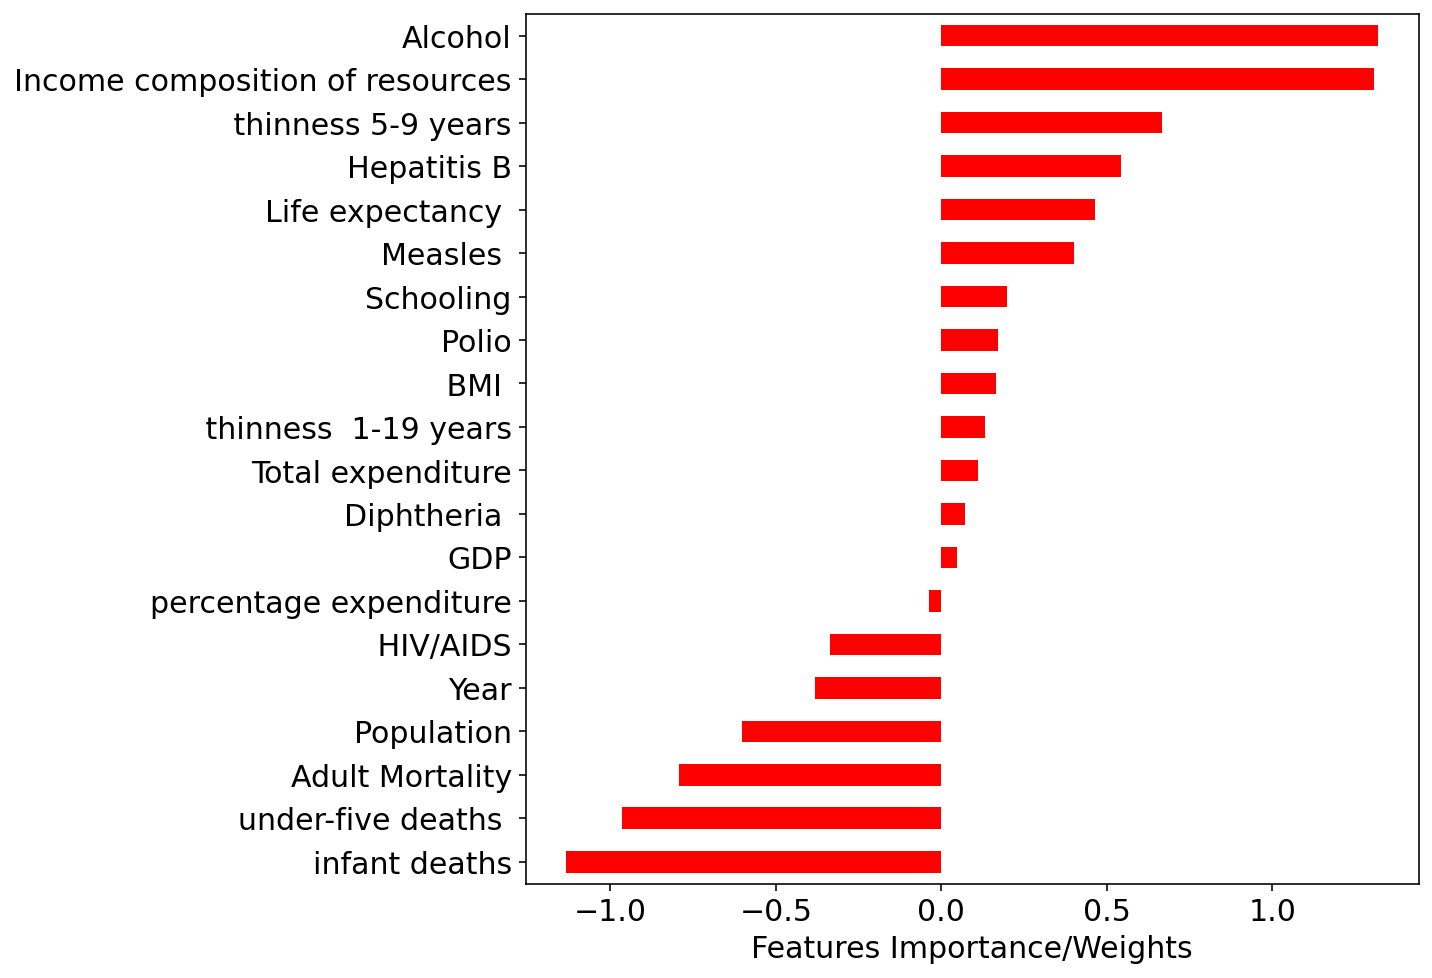

In [37]:
plot_features_weights(X.columns, svc.coef_.ravel())

## 결정 트리

In [38]:
features = df.columns.difference(['Country','Status'])
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
dtc = DecisionTreeClassifier() # (1) 모델 생성
dtc.fit(X_train, y_train) # (2) 훈련
dtc.score(X_test, y_test) # (3) 평가 (정확도)

0.9733656174334141

In [40]:
cross_validation(dtc,X,y)

0.9751

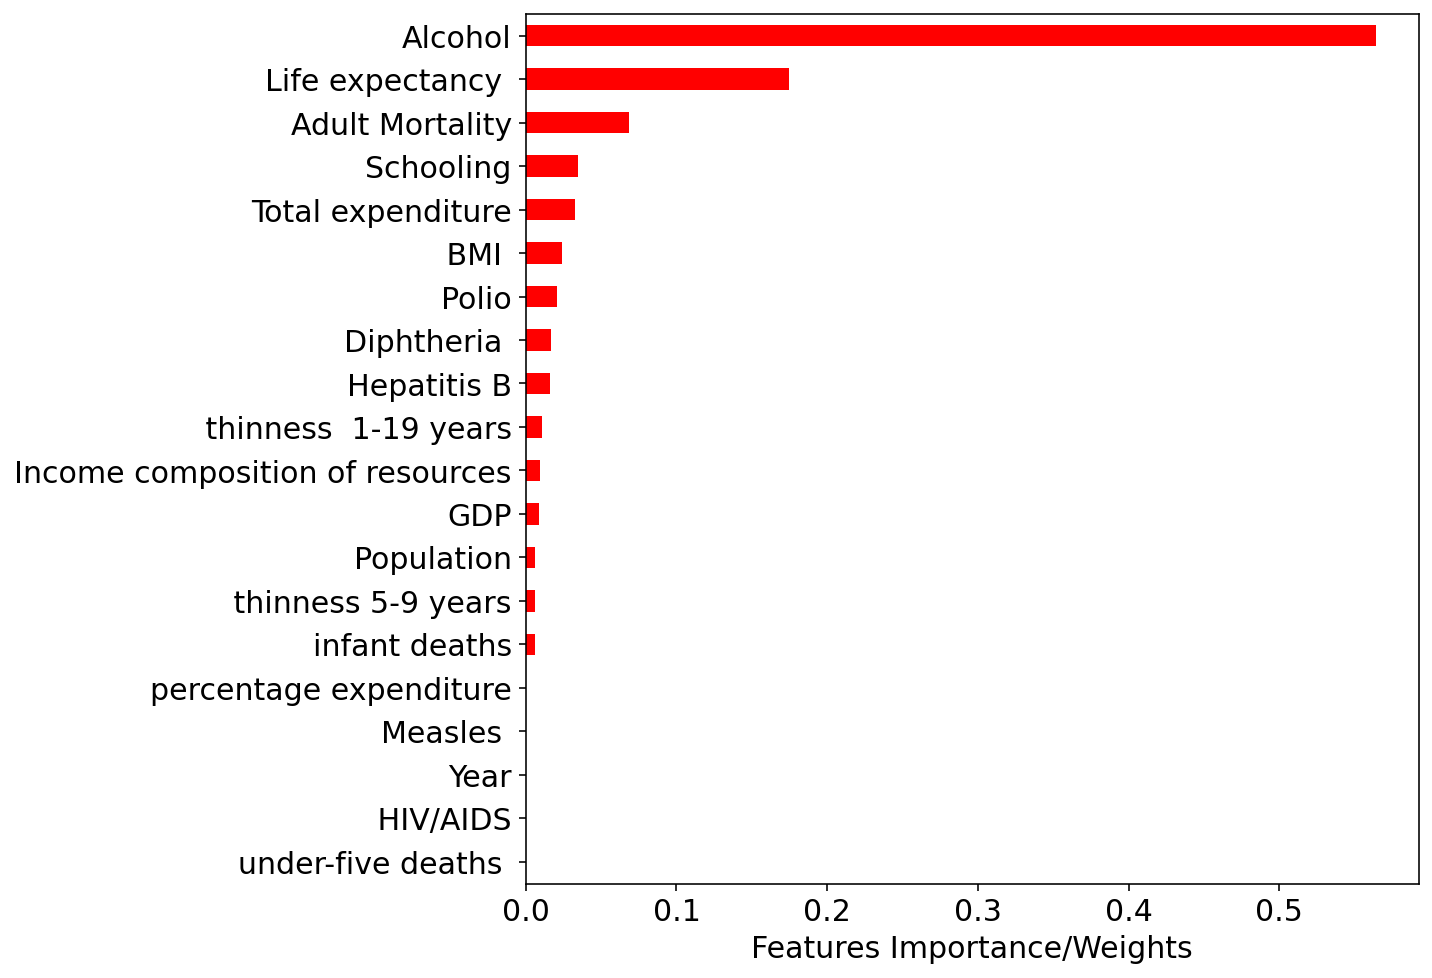

In [41]:
plot_features_weights(X.columns, dtc.feature_importances_)

In [42]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [43]:
y_pred = dtc.predict(X_test)
show_clf_result(y_test, y_pred)

[[350   6]
 [  5  52]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       356
           1       0.90      0.91      0.90        57

    accuracy                           0.97       413
   macro avg       0.94      0.95      0.94       413
weighted avg       0.97      0.97      0.97       413



- 결정 트리 보기

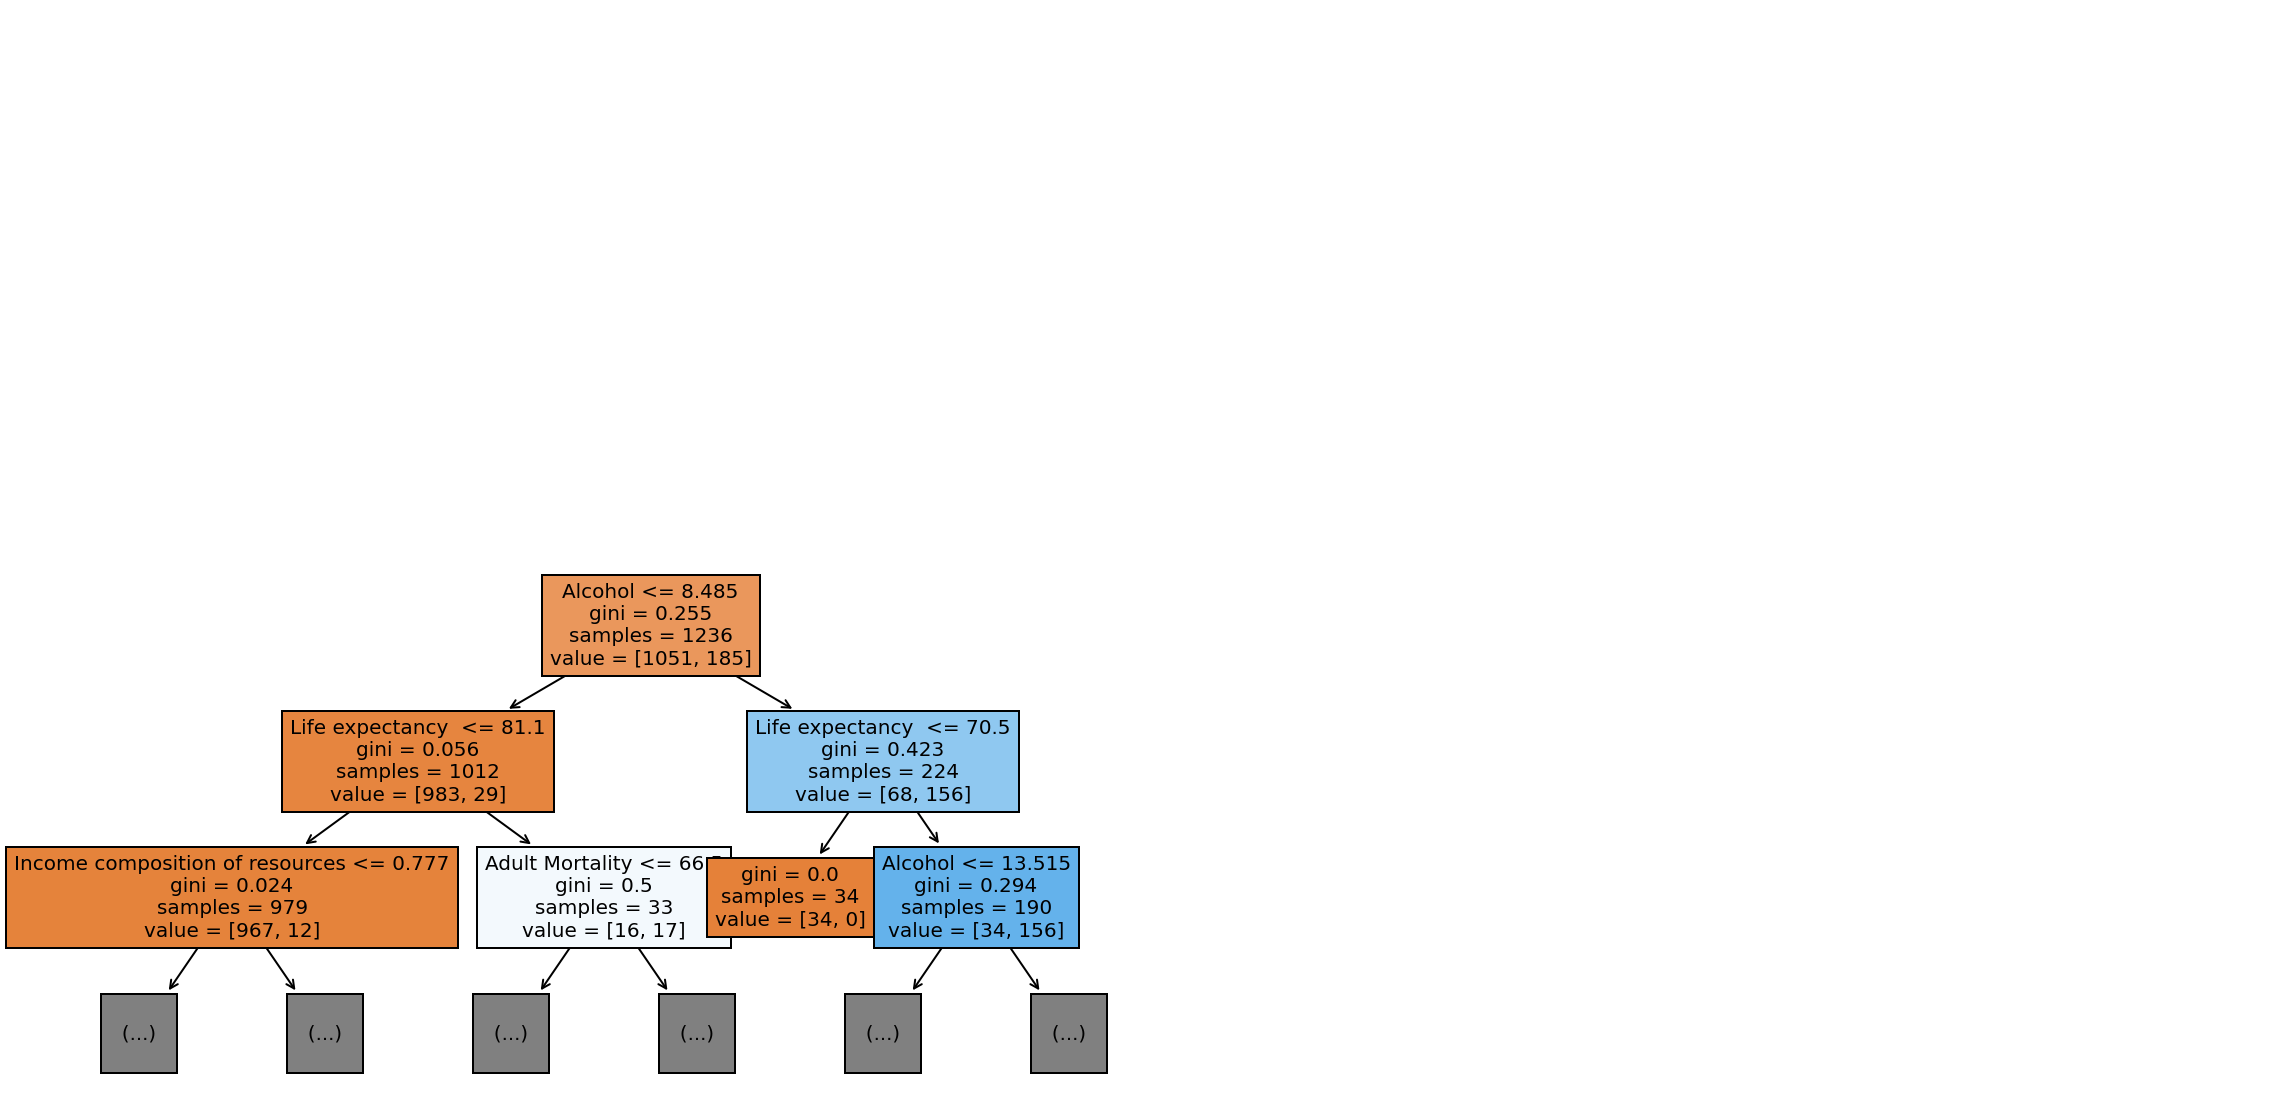

In [44]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(20,10))
# plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtc, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [45]:
print(tree.export_text(dtc, feature_names=list(X.columns)))

|--- Alcohol <= 8.48
|   |--- Life expectancy  <= 81.10
|   |   |--- Income composition of resources <= 0.78
|   |   |   |--- Alcohol <= 6.67
|   |   |   |   |--- class: 0
|   |   |   |--- Alcohol >  6.67
|   |   |   |   |--- Alcohol <= 6.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Alcohol >  6.69
|   |   |   |   |   |--- Hepatitis B <= 97.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Hepatitis B >  97.50
|   |   |   |   |   |   |--- Diphtheria  <= 97.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Diphtheria  >  97.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- Income composition of resources >  0.78
|   |   |   |---  BMI  <= 63.75
|   |   |   |   |--- Adult Mortality <= 132.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Adult Mortality >  132.00
|   |   |   |   |   |--- GDP <= 16573.52
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- GDP >  16573.52
|   |   |   |   |   |   |--- class: 0
| 

## 랜덤 포레스트

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 
rfc.score(X_test, y_test).round(4)

0.9855

In [47]:
cross_validation(rfc,X,y)

0.9842

In [48]:
y_pred = rfc.predict(X_test)
show_clf_result(y_test, y_pred)

[[351   5]
 [  1  56]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       356
           1       0.92      0.98      0.95        57

    accuracy                           0.99       413
   macro avg       0.96      0.98      0.97       413
weighted avg       0.99      0.99      0.99       413



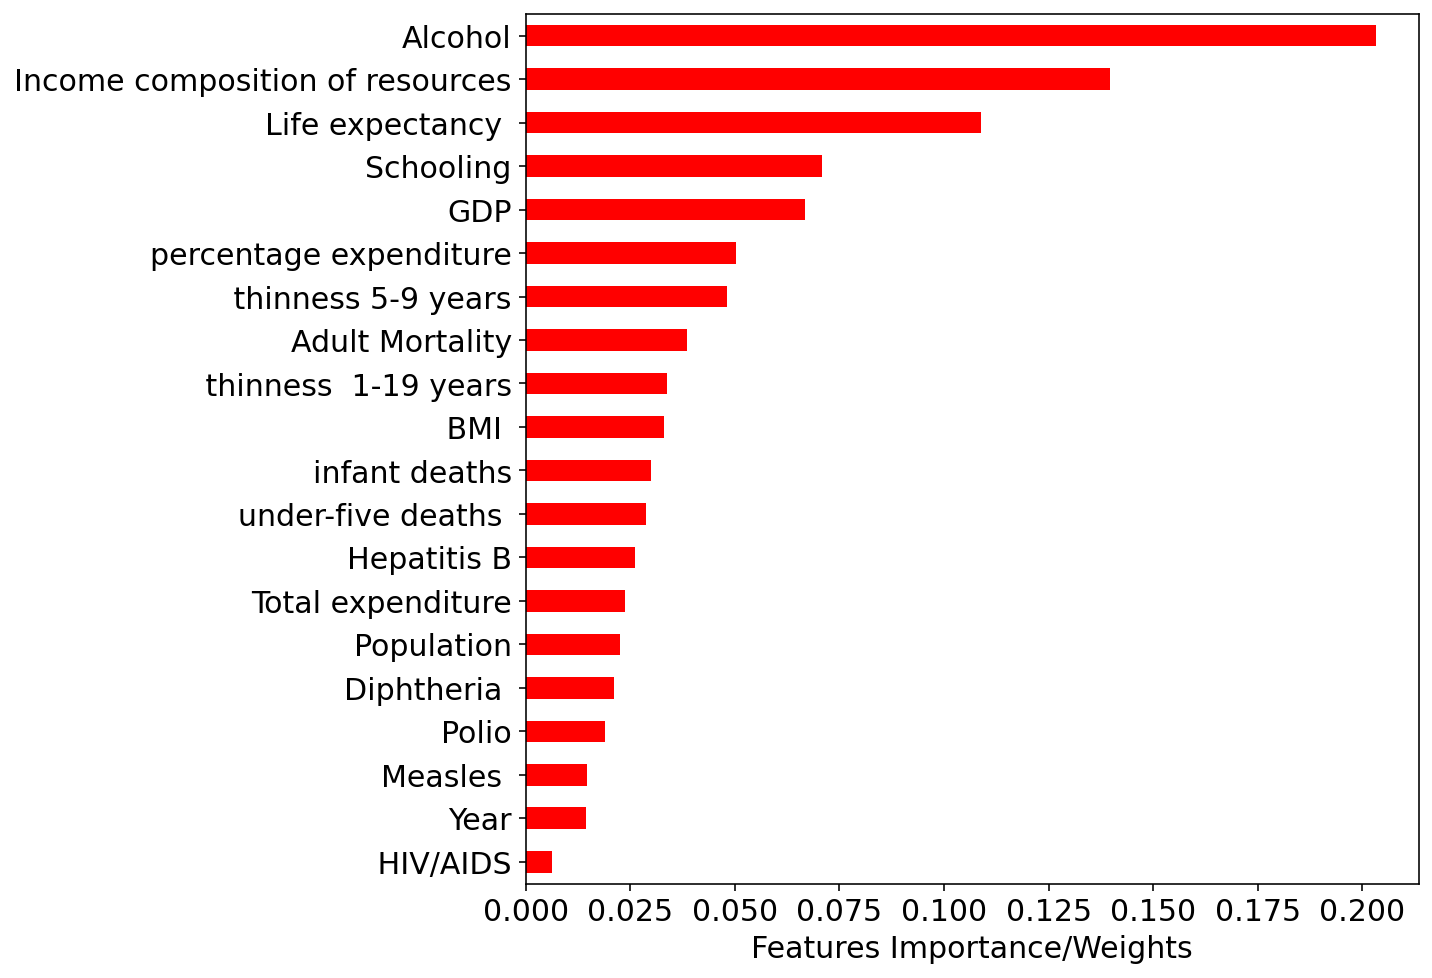

In [49]:
plot_features_weights(X.columns, rfc.feature_importances_)

## 부스팅 (LightGBM)

In [50]:
lgbm_c = LGBMClassifier()
lgbm_c.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
lgbm_c.score(X_test, y_test)

0.9927360774818402

In [51]:
cross_validation(lgbm_c,X,y)

0.9921

In [52]:
y_pred = lgbm_c.predict(X_test)
show_clf_result(y_test, y_pred)

[[353   3]
 [  0  57]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       356
           1       0.95      1.00      0.97        57

    accuracy                           0.99       413
   macro avg       0.97      1.00      0.99       413
weighted avg       0.99      0.99      0.99       413



In [53]:
X_test[y_test > y_pred]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Life expectancy,Measles,Polio,Population,Schooling,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths


In [54]:
wrong_1 = X_test[y_test > y_pred].index
df.loc[wrong_1]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [55]:
wrong_0 = X_test[y_test < y_pred].index
df.loc[wrong_0]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1034,Greece,2007,0,79.4,8.0,0,9.67,3632.243121,95.0,2,...,99.0,9.41,99.0,0.1,28827.32636,1148473.0,0.8,0.7,0.855,16.4
1031,Greece,2010,0,83.0,76.0,0,9.00,3189.754439,95.0,149,...,99.0,9.18,99.0,0.1,26917.75898,11121341.0,0.8,0.7,0.859,16.4
1035,Greece,2006,0,79.7,77.0,0,9.42,318.580663,94.0,0,...,98.0,9.34,98.0,0.1,2481.15781,112362.0,0.8,0.7,0.850,16.3


In [56]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [57]:
state = data.pivot_table(index='Country', columns='Status', aggfunc='count')['Year']
state[state[1].notnull()]

Status,0,1
Country,,
Australia,NaN,14.0
Austria,NaN,15.0
Belgium,NaN,15.0
Bulgaria,NaN,15.0
Croatia,NaN,8.0
Cyprus,NaN,15.0
Germany,NaN,15.0
Ireland,NaN,5.0
Italy,NaN,15.0
